# Testing 3D Meshes using the mshr module
## Starting with a simple 3D Sphere

<IPython.core.display.Javascript object>


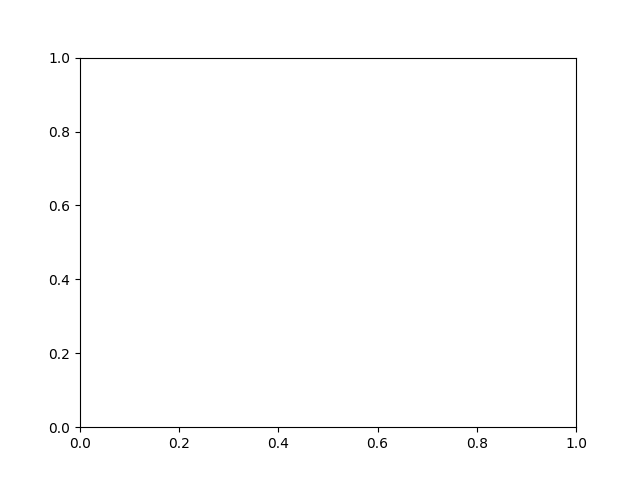

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efecd17d128>)

In [48]:
#importing the meshr module and the fenics module
from dolfin import *
from mshr import *

#Increasing the width of the notebook (visual difference only)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#have to define where to put plots BEFORE importing matplotlib
%matplotlib notebook

#importing matplotlib to plot results 
from matplotlib import pyplot as plt

#importing time to time length of mesh creation
import time

#importing numpy to work with arrays
import numpy as np

#importing random to distribute masses on a mesh
import random

#defining the radius of a circle
big_radius = 10

#defining center of the circle
big_center = Point(0,0,0)

#Defining a Sphere object with the same syntax as the Circle function
big_sphere = Sphere(big_center, big_radius)

#defining the domain
domain = big_sphere

#defining the mesh
mesh = generate_mesh(big_sphere, 20)

plt.subplots()

# mesh

## Looking at the time taken to generate mesh, compared to the mesh resolution

In [4]:
mesh_size = np.arange(6,20,2)
mesh_time = []

for i, size in enumerate(mesh_size):
    #getting time at start of the loop
    start_time = time.time()
    #generating mesh of the given resolution
    mesh = generate_mesh(domain, size)
    #finding time taken since start of loop iteration
    end_time = time.time()
    #total time taken
    time_taken = end_time - start_time
    #appending to empty array
    mesh_time = np.append(time_taken, mesh_time)  

#as we append, the times are in reverse order, so we need to flip the array along 0 axis
mesh_time = np.flip(mesh_time,0)

## Plotting the results on a bar chart, and comparing to a cubic relationship

<IPython.core.display.Javascript object>


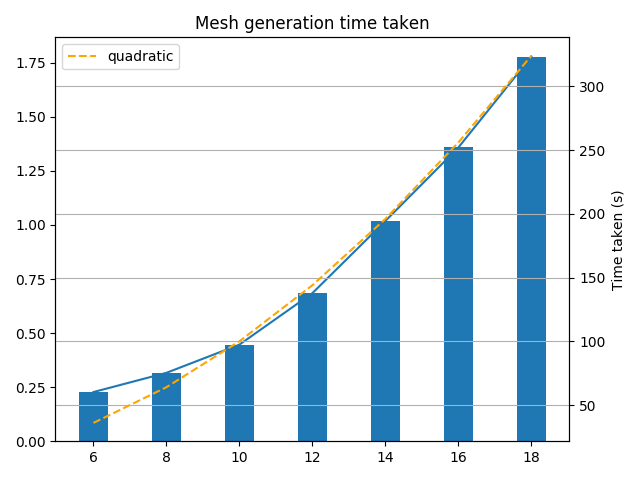

In [31]:
fig, times = plt.subplots()

times_2 = times.twinx()

times.bar(mesh_size, mesh_time)
times.plot(mesh_size, mesh_time, label = 'runtime')
#plotting quadratic relation, scaled

times_2.plot(mesh_size, mesh_size**2, linestyle = '--', label = 'quadratic', color = 'orange')
plt.title('Mesh generation time taken')
plt.xlabel('Mesh size')
plt.ylabel('Time taken (s)')
plt.grid()
plt.tight_layout()
plt.legend()

## Subtracting geometries (sphere with a hole)

In [51]:
#defining the outside sphere as the one obtained above
big_domain = big_sphere

#radius of inner circle
in_radius = 5

#center of inner circle
in_center = Point(0,10,0)

#inner sphere object
in_sphere = Sphere(in_center, in_radius)

#subtracting the two geometries
domain_hollow = big_domain + in_sphere

#generating and showing mesh
#generate mesh creates an object of the Mesh class
mesh = generate_mesh(domain_hollow, 20)
mesh

# Looking at properties of the mesh
## First, defining the mesh in its own cell so we don't have to recompute it every time

In [52]:
big_domain = big_sphere

#generating and showing mesh
mesh = generate_mesh(domain_hollow, 20)
# mesh

## Inspecting mesh propertes

### Querying the type of element used

In [53]:
mesh.cell_name()

'tetrahedron'

## Cells

In [54]:
#mesh.cells() gives a numpy array consisting of all cell IDs in the mesh
print('mesh.cells provides a {} numpy array'.format(mesh.cells().shape))

#num_cells() gives the total amount of cells in the mesh
print('there are {} cells in the mesh'.format(mesh.num_cells()))

#The contents of mesh.cells() give the indices of the vertices
mesh.cells().max()

mesh.cells provides a (16681, 4) numpy array
there are 16681 cells in the mesh


4118

## Coordinates

In [35]:
#num_vertices gives the number of vertices in the mesh
print('the mesh has {} vertices'.format(mesh.num_vertices()))

#mesh coordinates give the x,y,z coordimates of each vertex
print('mesh coordinates provides a {} numpy array'.format(mesh.coordinates().shape))

#Storing x, y, z coordinates of each point in a separate numpy array
x_coords = mesh.coordinates()[:,0]
y_coords = mesh.coordinates()[:,1]
z_coords = mesh.coordinates()[:,2]

#using the numpy linalg.norm function to get the radius(norm) of each vertex
r_coords = np.linalg.norm(mesh.coordinates(), axis=1)

the mesh has 4041 vertices
mesh coordinates provides a (4041, 3) numpy array


### Looking at the radial distribution of the points

#### Defining a function to calculate the histogram

In [45]:
def radial_dist_hist(mesh, bin_number):
    
    #Looking at how the points are distributed radially. If they are uniform, their density
    #should increase with r^3, scaled by 4/3 for the volume of the sphere
    #plotting histogram of point density radially
    plt.hist(r_coords, density=True, bins=bin_number, label = 'distribution')

    #defining a linespace of same size of radius
    points_plot = np.linspace(0,10,mesh.num_vertices())
    #plotting a cubic relation, scaled by the max element^3 to be of order unity
    plt.plot(points_plot, np.power(points_plot,2)/(2*np.max(points_plot))**(2), label = 'quadratic')
    plt.grid()
    plt.tight_layout()
    plt.legend()

<IPython.core.display.Javascript object>


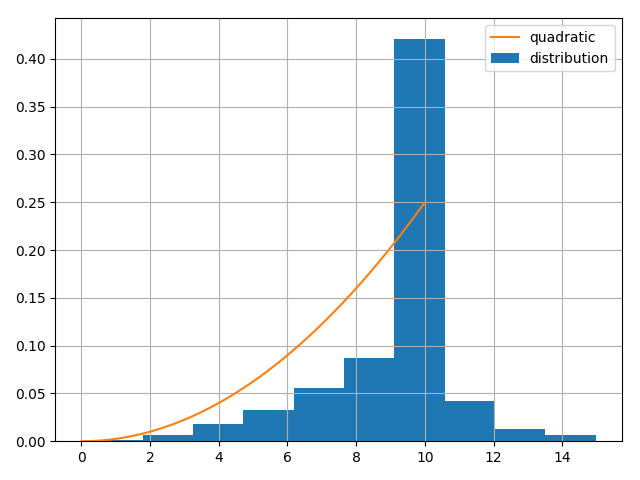

In [55]:
plt.subplots()

radial_dist_hist(mesh, 10)

## Subdomains in 3D (are not supported :\ )

In [ ]:
# domain_with_subs = Sphere(big_center, big_radius)

# #origin for each hollow sphere
# hollow_origin = Point(0,0,0)

# #determining how many rings we create to refine mesh
# how_fine = 10

# #overall outer radius of concentric rings
# hollow_outer = big_radius/3

# #radii of the subdomains we want to create, out to the radius of the domain big_radius,
# #in how_fine steps. We subtract ring_outer/how_fine from the inner and add it to the outer 
# #so the outer doesn't go out of bounds
# radius_in = np.linspace(hollow_outer/how_fine,hollow_outer*(1-1/how_fine),how_fine)
# radius_out = big_radius/how_fine + radius_in

# #using slightly modified version of make_ring function I made in 2D
# def make_hollow(origin, radius_in, radius_out):
#     sphere_out = Sphere(origin, radius_out)
#     sphere_in = Sphere(origin, radius_in)
#     hollow = sphere_out - sphere_in
#     return hollow

# #producing concentric rings from radius_in and radius_out
# hollows = [make_hollow(hollow_origin, radius_in[i], radius_out[i]) for i, hollow in enumerate(radius_in)]

# #assigning concentric rings to subdomains
# [domain_with_subs.set_subdomain(i+1, hollow) for i, hollow in enumerate(hollows)]

# # mesh = generate_mesh(domain_with_subs, 10)
# #mesh

## The code above gives an error if you ask to create the mesh, because subdomains are not supported in 3D!

## To be able to manage mesh refinements arbitrarily, we look at the MeshEditor class

In [ ]:
simple_sphere = Sphere(big_center, big_radius)

outside_point = Point(0,0,20)

mesh = generate_mesh(simple_sphere, 10)
#mesh

In [ ]:
edit_mesh = MeshEditor(mesh)

## Looking at the MeshCoordinates class

In [ ]:
#instantiating the object coordinates from the class MeshCoordinates, from our mesh
coordinates = MeshCoordinates(mesh)

In [ ]:
coordinates

In [ ]:
#finding the values of the vertices with compute_vertex_value (values in what sense? not sure)
print('compute_vertex_values returns an {} np array'.format(coordinates.compute_vertex_values(mesh).shape))
coordinates.compute_vertex_values(mesh)[0:6]

#finding the amount of mesh points with count()
print('the mesh has {} vertices'.format(coordinates.count()))

## MeshEditor class (stopped here for now, to work on implementing the MOND equation in full with a simple spherical mesh)

In [ ]:
#declaring a MeshEditor object 
edit_mesh = MeshEditor()

In [ ]:
#to open a mesh in the mesh editor, we need the cell type from the cell_name() method of mesh
edit_mesh.open(mesh, mesh.cell_name(), 3, 3)

In [ ]:
point1 = Point()

[Point]